# Exam 2019

In [19]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smp
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

sns.set(rc={'figure.figsize':(12, 12)})

## Exercise 1

In [20]:
path = 'PreviousExams/data/frami.csv' # Change
frami = pd.read_csv(path)
frami.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### C1
**¿Cuántas observaciones hay en la tabla? ¿Cuántas variables?**

In [21]:
frami.shape

(4240, 16)

#### C2
**¿Hay datos ausentes? ¿De qué tipo son las variables?**


In [22]:
data_na =  frami.isna()
data_na.sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Hay datos ausentes para las variables education, cigsPerDay, totChol, BMI, heartRate and glucose

In [23]:
frami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


- male, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes, are int but they are a factor (boolean)
- age, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD are discrete numerical (int)
- education is float but looks like a factor

#### C3
**Antes de seguir adelante vamos a eliminar todas las observaciones que contienen datos ausentes.
Asegúrate de que el conjunto de datos resultante se sigue llamando frami. ¿Cuántas observaciones han
quedado en la tabla tras eliminar los datos ausentes?**

In [24]:
frami.dropna(inplace=True)

In [25]:
np.any(frami.isna())

False

In [26]:
frami.shape

(3658, 16)

Han quedado 3658 observaciones

## Exercise 3

#### C4
**Vamos a analizar la posible relación entre el factor género (variable male) y el factor fumador
(variable currentSmoker). Haz un análisis mediante gráficos de esa relación. Calcula la tabla de
probabilidad, con probabilidades marginales, asociada a la relación entre estos dos factores.**

<AxesSubplot: xlabel='male,currentSmoker'>

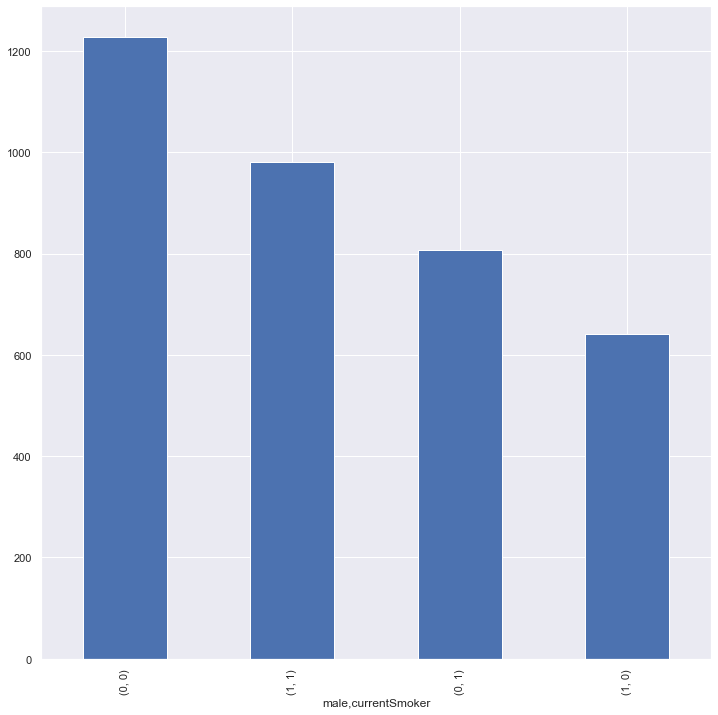

In [27]:
frami[["male", "currentSmoker"]].value_counts().plot(kind = 'bar')

In [28]:
CT = pd.crosstab(frami.male, frami.currentSmoker, normalize=True)
CT

currentSmoker,0,1
male,,
0,0.335429,0.220886
1,0.175506,0.268179


currentSmoker      0      1
male                       
1              39.56  60.44
0              60.29  39.71


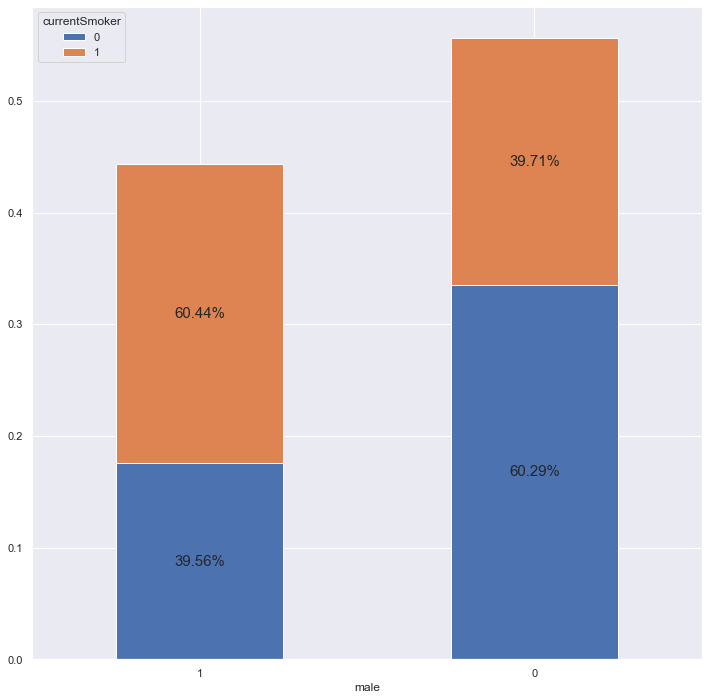

In [29]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)

# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')

percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
#La tabla percents seria la tabla de las probabilidades
percents.to_numpy()
print(percents)

percents.iloc[:, 0]
ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)

plt.show()

#### C5
**¿Cuál es la probabilidad de que un fumador sea mujer?**

In [30]:
frami_fum = frami[frami.currentSmoker == 1]
p = sum(frami_fum.male == 0)/len(frami_fum)
p

0.45164896590273895

#### C6
**¿Y cuál es la probabilidad de que un hombre sea fumador?**

In [31]:
frami_h = frami[frami.male == 1]
p = sum(frami_h.currentSmoker == 1)/len(frami_h)
p

0.6044362292051756

#### C7
**¿Cuál es la probabilidad de que una persona elegida al azar sea fumadora? ¿Y de que sea a la vez
hombre y no fumador?**

Probabilidad de que una persona elegida al azar sea fumadora

In [32]:
p_fum = sum(frami.currentSmoker)/len(frami)
p_fum

0.48906506287588847

Probabilidad de que una persona elegida al azar sea a la vez hombre y no fumador

In [33]:
p = sum(frami.male & (frami.currentSmoker == 0))/len(frami)
p

0.17550574084199017

#### C8
**Si las dos variables aleatorias género male y condición de fumador currentSmoker fueran independientes se cumpliría exactamente**

**P(hombre y fumador ) = P(hombre) · P(fumador )**

**Pero los datos que tenemos son muestrales, así que lo más que podemos esperar es una igualdad
aproximada. ¿Se cumple esa igualdad aproximada en nuestros datos? ¿Qué opinas sobre la independencia
de estas variables?**

Probabilidad de ser hombre

In [34]:
p_h = len(frami_h)/len(frami)
p_h

0.4436850738108256

Probabilidad de ser fumador

In [35]:
p_fum

0.48906506287588847

Probabilidad teorica de ser hombre y fumador

In [36]:
p_h_fum = p_h*p_fum
p_h_fum

0.21699086852038466

In [37]:
p_h_fum_2 = sum(frami_h.currentSmoker)/len(frami)
p_h_fum_2

0.26817933296883545

La probabilidad es bastante mayor de la esperada, por lo que probablemente no sean sucesos independientes

#### C9
**Si elegimos de forma independiente (con remplazamiento) 10 personas de esta muestra, ¿cuál es la
probabilidad de que 4 de ellas sean fumadoras? ¿Y cuál es la probabilidad de que lo sean 4 o menos?**

Binomial 4 personas

In [38]:
n = 10
r = 4
p = p_fum
stats.binom.pmf(r, n = n, p = p)

0.21373687425981325

In [83]:
n = 10
r = 4
p = p_fum
stats.binom.cdf(r, n = n, p = p)

0.40414014795311587

#### OP1
**Opcional: la prueba χ2
, que no hemos visto en clase, es un contraste de hipótesis sobre independencia de dos factores. 
La hipótesis nula de ese contraste es siempre los factores son independientes.**

**Ejecuta en R:**

**chisq.test(frami$male, frami$currentSmoker)**

**Examina el resultado y saca conclusiones sobre la independencia de esos dos factores.**

- Ho: the 'male' and 'currentSmoker' variables are independent
- Ha: the 'male' and 'currentSmoker' variables are not independent

In [40]:
ct = pd.crosstab(frami.male, frami.currentSmoker)
stats.chi2_contingency(ct)

(154.57443577006717,
 1.7345763380717555e-35,
 1,
 array([[1039.75259705,  995.24740295],
        [ 829.24740295,  793.75259705]]))

The p-value is lover than 0.05, therefore we reject the null hypothesis and conclude that the variables 'male' and 'currentSmoker' are not independent

## Exercise 3

#### C10

**En este apartado trabajamos con la variable heartRate, la frecuencia cardiaca. Haz un resumen
numérico básico. ¿Es representativa la media? Represénta la variable**

In [41]:
frami.heartRate.describe()

count    3658.000000
mean       75.730727
std        11.981525
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

(array([  8.,  47., 117., 350., 503., 587., 697., 489., 337., 212., 144.,
         91.,  25.,  32.,   5.,   8.,   3.,   1.,   0.,   2.]),
 array([ 44.  ,  48.95,  53.9 ,  58.85,  63.8 ,  68.75,  73.7 ,  78.65,
         83.6 ,  88.55,  93.5 ,  98.45, 103.4 , 108.35, 113.3 , 118.25,
        123.2 , 128.15, 133.1 , 138.05, 143.  ]),
 <BarContainer object of 20 artists>)

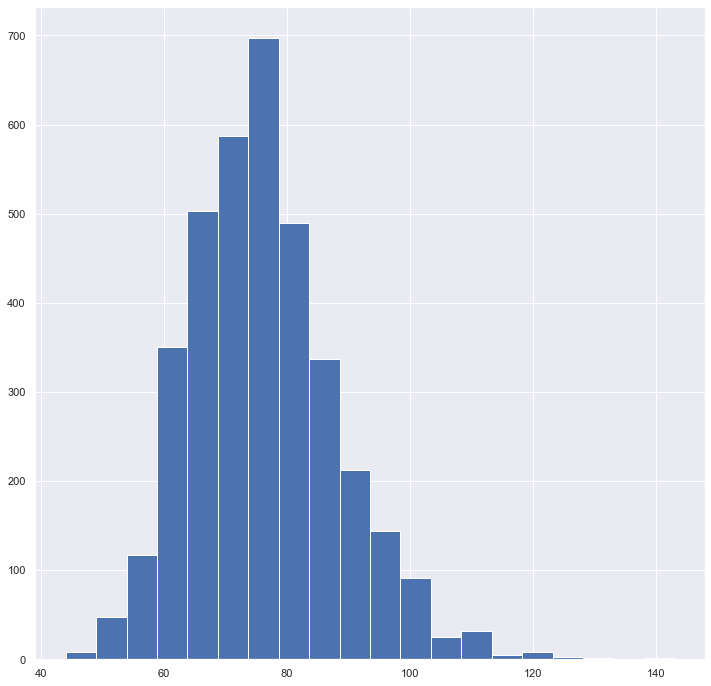

In [42]:
plt.hist(frami.heartRate, bins = 20)

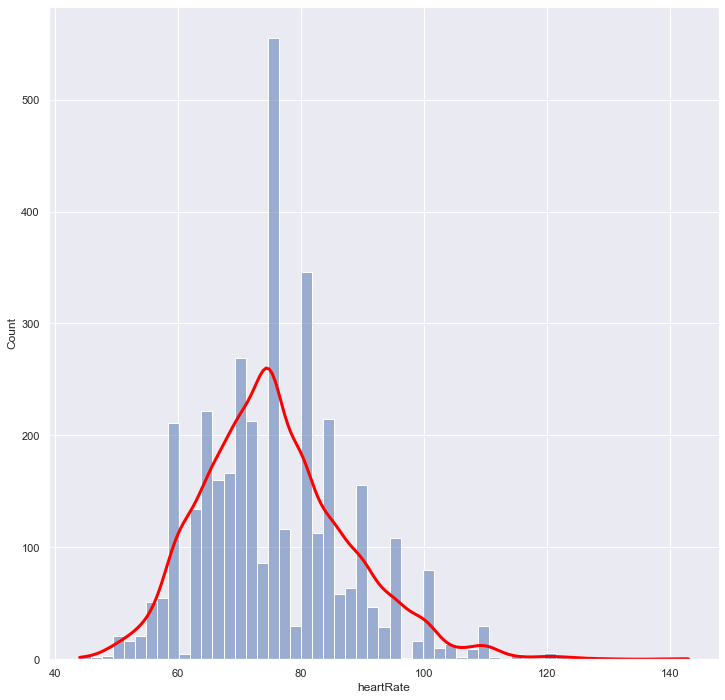

In [43]:
dens_plot = sns.histplot(data = frami, x = 'heartRate', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

#### C11
**¿Hay datos atípicos? ¿Cuántos? ¿Sabes qué posiciones (número de fila) ocupan en la tabla?**

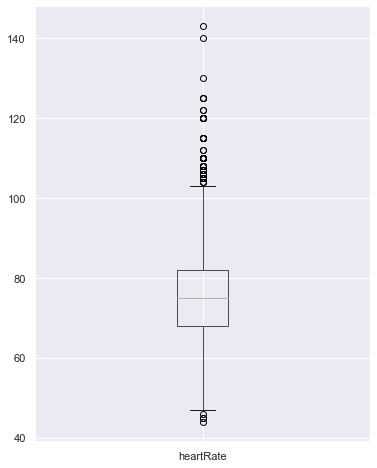

In [44]:
getPlot = frami.boxplot(column='heartRate', figsize=(6, 8))

Existen bastantes datos atipicos, sobre todo en la cola derecha

In [45]:
q1 = frami.heartRate.describe()["25%"]
q3 = frami.heartRate.describe()["75%"]
IQR = q3 - q1
outliers = frami[((frami.heartRate<(q1-1.5*IQR)) | (frami.heartRate>(q3+1.5*IQR)))]
print(f"There are {len(outliers)} outliers, that occupy the following positions in the dataset: {outliers.index.values}")

There are 80 outliers, that occupy the following positions in the dataset: [ 162  270  339  358  409  492  523  562  630  639  697  722  740  742
  824  833  909  911  913  923  983 1008 1022 1182 1233 1462 1570 1728
 1783 1790 1807 1844 1881 1902 2041 2162 2180 2237 2242 2275 2299 2382
 2388 2434 2459 2482 2492 2646 2663 2733 2750 2922 3037 3112 3142 3164
 3194 3225 3231 3233 3242 3343 3391 3425 3495 3505 3585 3740 3747 3800
 3819 3844 3862 3875 3912 3964 4053 4070 4164 4195]


#### C12
**¿Crees que esta variable es aproximadamente normal? Justifica tu conclusión basándote en los
gráficos del apartado anterior o en algún gráfico adicional.**

C:\Users\Maria\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


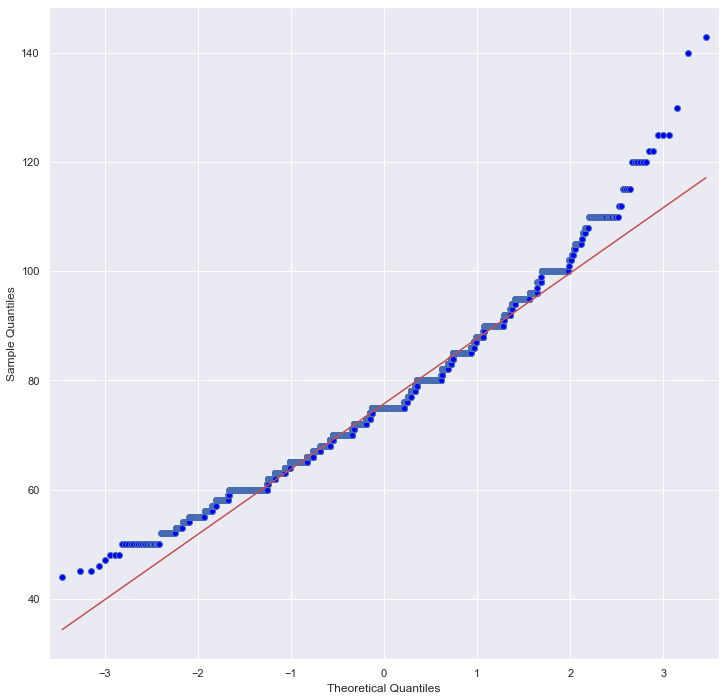

In [46]:
sm.qqplot(frami.heartRate, line = 's')
plt.show()

The left tail looks too long to be a normal variable. We confirm this by calculating it mathematically with the Shapiro-Wilk test.
- Ho: the data was drawn from a normal distribution
- Ha: the data was not drawn from a normal distribution

In [47]:
shap_wilk = stats.shapiro(frami.heartRate)
shap_wilk.pvalue

9.960976848807244e-26

The p-value is lower than 0.05, therefore we reject the null hypothesis and we confirm that the sample was not drawn from a normal distribution 

#### C13
**Asumiendo que es aproximadamente normal (sea cual sea tu conclusión del apartado anterior)
construye un intervalo de confianza al 95% para la media de esta variable**

In [48]:
n = len(frami)
barX = frami.heartRate.mean()
s = frami.heartRate.std()

cl = 0.95 
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval is  [75.34245314 76.11900121]
Rounded to 4 digits: [75.34, 76.12]


The confidence interval for the mean is [75.34, 76.12]

## Exercise 4

#### C14
**¿Cuántas personas padecen diabetes? Para las personas que padecen diabetes y que tienen edades
superiores a 50 años ¿cuál es su nivel medio de colesterol?**

In [49]:
print(f"There are {sum(frami.diabetes)} people that suffer from diabetes")

There are 99 people that suffer from diabetes


In [50]:
avg_chol = frami[frami.diabetes & (frami.age > 50)].totChol.mean()
print(f"There average cholesterol for people who have diabetes and are over 50 is {avg_chol}")

There average cholesterol for people who have diabetes and are over 50 is 257.6619718309859


#### C15
**Haced una tabla cruzada en la que parezca el nivel medio de colesterol para cada combinación
posible de las variables nivel de educación y género (male)**

In [51]:
frami.groupby(['education', 'male']).totChol.mean()

education  male
1.0        0       241.825767
           1       233.665260
2.0        0       237.378462
           1       231.811530
3.0        0       239.854271
           1       234.480952
4.0        0       237.058140
           1       234.442231
Name: totChol, dtype: float64

#### Exercise 5

#### C16
**Analicemos ahora la posible relación entre las variables presión sistólica sysBP y presión
diastólica diaBP. Haz un diagrama de dispersión y un modelo de regresión lineal usando sysBP como
variable respuesta y diaBP como variable explicativa. Añade la recta de regresión lineal al diagrama de
dispersión.**$

In [52]:
X = frami.diaBP
Y = frami.sysBP
X_1 = sm.add_constant(X)
model = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     5936.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:58:30   Log-Likelihood:                -14747.
No. Observations:                3658   AIC:                         2.950e+04
Df Residuals:                    3656   BIC:                         2.951e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0551      1.578      7.640      0.000       8.962      15.149
diaBP          1.4510      0.019     77.045      0.000       1.414       1.488
==============================================================================
Omnibus:                      929.609   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2863.079
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                       6.480   Cond. No.                         586.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Linear Regression')

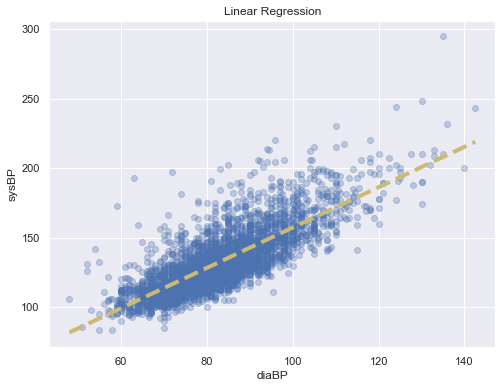

In [53]:
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
fit.pred = fit.get_prediction(X_new)
fit_fitted_new = fit.pred.summary_frame(alpha=0.05)["mean"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data", alpha = 0.3)
ax.plot(X_new[:,1], fit_fitted_new, "y--", lw = 4)
plt.xlabel('diaBP')
plt.ylabel('sysBP') 
plt.title('Linear Regression')

#### C17
**¿Crees que el modelo de regresión lineal es adecuado para describir la relación entre esas variables?**

1. The diagram looks fine
2. The variance explained is quite high: r2 = 0.619
3. The p-value for beta1 = 0 < 0.05, so this parameter is necessary

We can still check the residuals

In [54]:
%run ./code/Linear_Reg_Diagnostic.py
fit_diagnose = Linear_Reg_Diagnostic(fit)

This graph shows if there are any nonlinear patterns in the residuals, and thus in the data as well. One of the mathematical assumptions in building an OLS model is that the data can be fit by a line. If this assumption holds and our data can be fit by a linear model, then we should see a relatively flat line when looking at the residuals vs fitted.

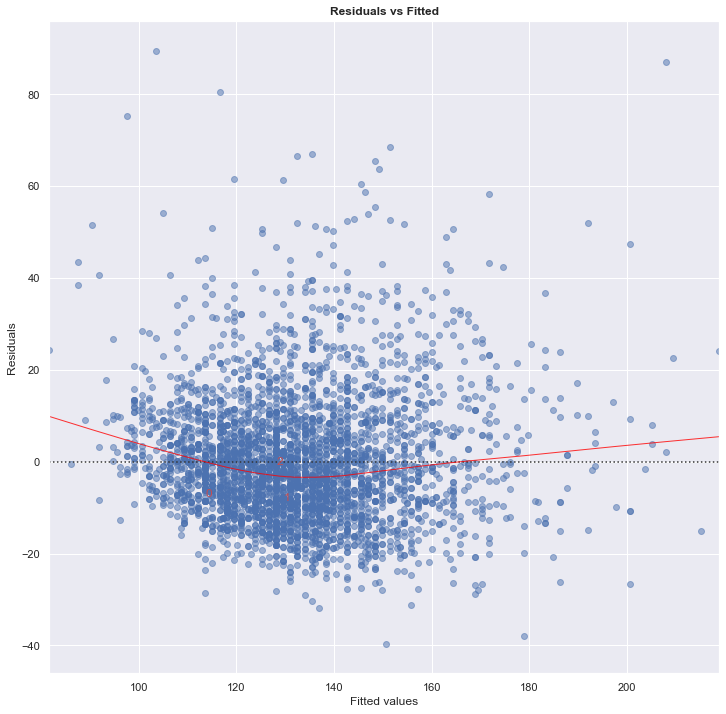

In [55]:
fit_diagnose.residual_plot()
plt.show()

The residuals seem to be located towards lower values of the fitted values, not randomly scattered. However, the red line does seem to be somewhat horizontal. More diagnosis plots will be needed to draw a conclusion. Next, we will use the qq-plot.

C:\Users\Maria\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


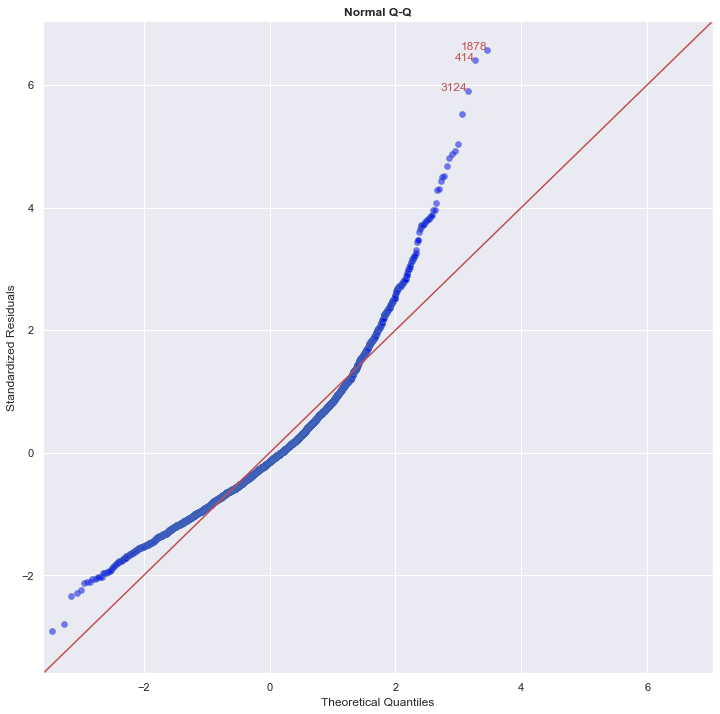

In [56]:
fit_diagnose.qq_plot()
plt.show()

Notice the points form a curve instead of a straight line. Normal Q-Q plots that look like this usually mean your sample data are skewed.

Finally, we use the leverage plot

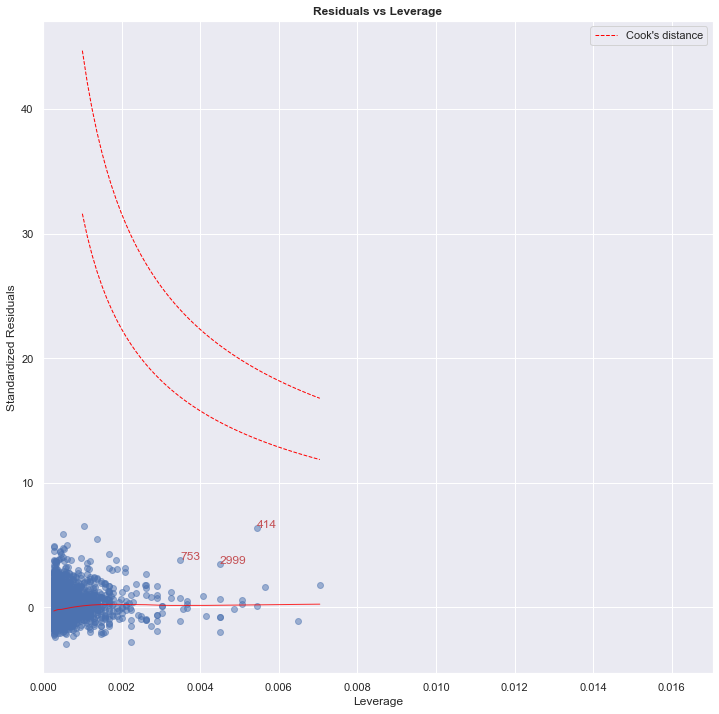

In [57]:
fit_diagnose.leverage_plot()
plt.show()

In [58]:
fit_influence = fit.get_influence()
hatValues = fit_influence.hat_matrix_diag
sum(hatValues > 4 / len(frami))

297

It looks like there are some points that have a lot of leverage towards the biggest values of the dataset that tilt the regression line. This makes predictions for lower values, which are more common, worse. It would be important to perform this regression with and without the outliers, to see the difference in the results.

#### C18
**¿Qué porcentaje de la variabilidad en diaBP se explica con ese modelo de regresión?**

In [59]:
# Pearson correlation coefficient
print(f'The percentage of explained variability is calculated with the Pearson correlation coefficient: {fit.rsquared} or {fit.rsquared*100}%')

The percentage of explained variability is calculated with the Pearson correlation coefficient: 0.6188486783818301 or 61.88486783818301%


#### C19
**¿Cuál es el valor de diaBP que predice el modelo para alguien con sysBP igual a 160? Se valora el
uso de predict.**

In [60]:
X_new = [1,160]
fit.predict(X_new)

array([244.22060087])

### C20
**¿Cuál es el residuo de la primera observación de la tabla?**

In [85]:
x = [1, frami.diaBP.values[0]]
y_hat = fit.predict(x)
y_hat

array([113.62750049])

In [86]:
y = frami.sysBP.values[0]
y

106.0

In [87]:
res = y_hat - y
res

array([7.62750049])

#### OP2

**Opcional: vamos a pensar sobre la posible influencia del género en ese modelo de regresión.
Pra ello vamos a construir dos modelos de regresión adicionales para las mismas variables (diaBP,
sysBP). Pero en el primer modelo usamos solo observaciones de hombres y en el segundo modelo solo
observaciones de mujeres. Representa las dos rectas en el mismo diagrama de dispersión que la recta
del primer modelo (en total habrá tres rectas). Saca conclusiones sobre la posible influencia del género
en la regresión.**

## Exercise 6

#### C21
**Pensemos en la variable nivel de colesterol totChol. Sospechamos que el nivel medio de colesterol
de las personas de la muestra es mayor que 235. ¿Avalan los datos esta sospecha, con un nivel de
significación del 95%?**

- Ho: the avg level of cholesterol is equal or lower than 235
- Ha: the avg level is higher than 235

In [65]:
X = frami.totChol.values

mu0 = 235 # Change to null hypothesis mean
alternative = "greater"

Tscore, pValue = stats.ttest_1samp(X, 
                                   popmean=mu0,
                                   alternative=alternative)

print("The sample size is {:3d}".format(len(X)))
print("The sample mean is {:.4}".format(X.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is 3658
The sample mean is 236.8
The T score is 2.534
And the corresponding p-value is 0.005656


The p-value is lower than 0.05. Therefore, we can reject Ho and conclude that the avg cholesterol is higher than 235

#### C22
**Repite el análisis pero ahora solo con observaciones correspondientes a hombres. Y luego con
observaciones de mujeres. ¿Qué piensas sobre la relación entre nivel de colesterol y el género?**

For men:

In [66]:
X = frami[frami.male == 1].totChol

mu0 = 235 # Change to null hypothesis mean
alternative = "greater"

Tscore, pValue = stats.ttest_1samp(X, 
                                   popmean=mu0,
                                   alternative=alternative)

print("The sample size is {:3d}".format(len(X)))
print("The sample mean is {:.4}".format(X.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is 1623
The sample mean is 233.4
The T score is -1.592
And the corresponding p-value is 0.9442


The p-value is greater than 0.05, therefore we cannot reject the null hypothesis. We cannot say that the average cholesterol in men is higher that 235

In [67]:
X = frami[frami.male == 0].totChol

mu0 = 235 # Change to null hypothesis mean
alternative = "greater"

Tscore, pValue = stats.ttest_1samp(X, 
                                   popmean=mu0,
                                   alternative=alternative)

print("The sample size is {:3d}".format(len(X)))
print("The sample mean is {:.4}".format(X.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is 2035
The sample mean is 239.6
The T score is 4.511
And the corresponding p-value is 3.409e-06


The p-value is lower than 0.05. Therefore, we can reject Ho and conclude that the avg cholesterol in women is higher than 235

Gender is related to cholesterol levels and the average cholesterol level is higher in women than in men.

#### C23
**Estudia la normalidad de la variable edad.**

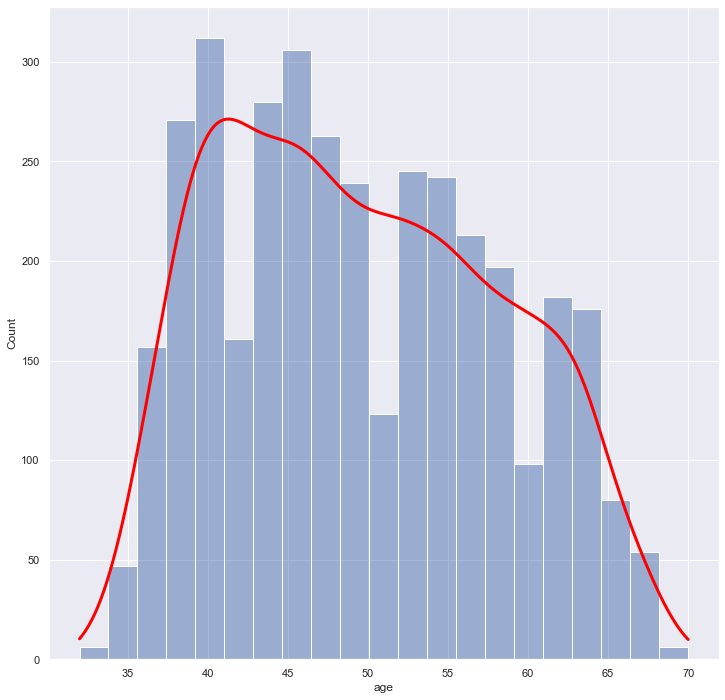

In [68]:
dens_plot = sns.histplot(data = frami, x = 'age', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

The tails look too short to be a normal variable. We confirm this by calculating it mathematically with the Shapiro-Wilk test.
- Ho: the data was drawn from a normal distribution
- Ha: the data was not drawn from a normal distribution

In [71]:
shap_wilk = stats.shapiro(frami.age)
shap_wilk.pvalue

2.183956890169002e-28

The p-value is lower than 0.05, therefore we reject the null hypothesis and we confirm that the sample was not drawn from a normal distribution 

#### OP3

**Opcional: en el tema 5 hemos visto como usar el bootstrap para calcular un intervalo de confianza.
Usa ese método para hacer un intervalo de confianza bootstrap al 95% para la edad en la muestra**

#### C24
**Divide la variable edad en 4 subintervalos de longitud 10 años y llama franjaEdad al resultado.
Divide el colesterol en intervalos de 100 unidades desde 100 hasta 600 y llama nivelCol al resultado.
Ahora estudia la psible relación entre franjaEdad y nivelCol.**

In [72]:
print(frami.age.min())
print(frami.age.max())

32
70


In [73]:
start = 30
stop = 80
step = 10

C_nodes = np.arange(start, stop, step)
print(C_nodes)
frami['age_binned'] = pd.cut(frami['age'], bins=C_nodes, ordered=True)
print(frami[['age', 'age_binned']].head(10))

[30 40 50 60 70]
   age age_binned
0   39   (30, 40]
1   46   (40, 50]
2   48   (40, 50]
3   61   (60, 70]
4   46   (40, 50]
5   43   (40, 50]
6   63   (60, 70]
7   45   (40, 50]
8   52   (50, 60]
9   43   (40, 50]


In [74]:
start = 100
stop = 700
step = 100

C_nodes = np.arange(start, stop, step)
print(C_nodes)
frami['totChol_binned'] = pd.cut(frami['totChol'], bins=C_nodes, ordered=True)
print(frami[['totChol', 'totChol_binned']].head(10))
print(frami.totChol_binned.value_counts(dropna=False))

[100 200 300 400 500 600]
   totChol totChol_binned
0    195.0     (100, 200]
1    250.0     (200, 300]
2    245.0     (200, 300]
3    225.0     (200, 300]
4    285.0     (200, 300]
5    228.0     (200, 300]
6    205.0     (200, 300]
7    313.0     (300, 400]
8    260.0     (200, 300]
9    225.0     (200, 300]
(200, 300]    2608
(100, 200]     765
(300, 400]     276
(400, 500]       8
(500, 600]       1
Name: totChol_binned, dtype: int64


In [80]:
CT = pd.crosstab(frami['age_binned'], frami['totChol_binned'])
CT

totChol_binned,"(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]"
age_binned,,,,,
"(30, 40]",267,358,23,0,0
"(40, 50]",303,1006,80,5,0
"(50, 60]",134,863,117,3,1
"(60, 70]",61,381,56,0,0


In [81]:
stats.chi2_contingency(CrosstabResult)

(266.9698113870133,
 3.9144630273487385e-50,
 12,
 array([[1.35516676e+02, 2.91528157e+02, 2.33808092e+02, 1.04147075e+02],
        [4.61996720e+02, 9.93863313e+02, 7.97086933e+02, 3.55053034e+02],
        [4.88922909e+01, 1.05178786e+02, 8.43542920e+01, 3.75746309e+01],
        [1.41716785e+00, 3.04866047e+00, 2.44505194e+00, 1.08911974e+00],
        [1.77145981e-01, 3.81082559e-01, 3.05631493e-01, 1.36139967e-01]]))

The p-value is lover than 0.05, therefore we reject the null hypothesis and conclude that the variables 'age_binned' and 'totChol_binned' are not independent

In [82]:
# We add to the table the totals for each row
CT = CrosstabResult
CT['total'] = CT.sum(axis=1)
# # Sort the table using those totals
# CT.sort_values('total', inplace=True)
# # Remove them so thay do not interfere with the graphic
# CT2= CT.drop(columns='total')

# percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
# print(percents)
# percents.iloc[:, 0]
# ax = CT2.plot.bar(stacked = True, rot = 0)

# for i in range(len(ax.containers)):
#     c = ax.containers[i]  
#     # percent labels (or empty string below a threshold for close to 0%)
#     labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
#     # add labels to bars
#     ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)

# plt.show() 

TypeError: 'fill_value=total' is not present in this Categorical's categories